In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import PIL.Image
from PIL import ImageEnhance



import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
train_dir=r'C:\Users\LENOVO\Desktop\Ressources\OpenCV and Tensorflow\Vegetables\train'
val_dir=r'C:\Users\LENOVO\Desktop\Ressources\OpenCV and Tensorflow\Vegetables\validation'
test_dir=r'C:\Users\LENOVO\Desktop\Ressources\OpenCV and Tensorflow\Vegetables\test'

In [3]:
#plot_random_image(train_dir)

In [4]:
IMAGE_SIZE = (224,224)

In [5]:
train_ds_ = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    shuffle=True,
)

# Load test and validation data
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)

val_ds_ = image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [6]:
# USE OF PATHLIB

In [7]:
import pathlib

In [8]:
train_dir = pathlib.Path(train_dir)
train_dir

WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train')

In [9]:
val_dir = pathlib.Path(val_dir)
val_dir

WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/validation')

In [10]:
test_dir = pathlib.Path(test_dir)
test_dir

WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/test')

In [11]:
L =[train_dir,val_dir,test_dir]
for i in L:
    image_count = len(list(i.glob('*/*.jpg')))
    print(image_count)

15000
3000
3000


In [12]:
list(train_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Bean/0026.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Bean/0028.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Bean/0029.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Bean/0030.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Bean/0034.jpg')]

In [13]:
classes = []
for folder in os.listdir(train_dir):
    classes.append(folder)
classes

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [14]:
# Train Data

In [15]:
for i in classes :
    print('Number of',i,'is',len(list(train_dir.glob('*i/*.jpg'))))

Number of Bean is 1000
Number of Bitter_Gourd is 1000
Number of Bottle_Gourd is 1000
Number of Brinjal is 1000
Number of Broccoli is 1000
Number of Cabbage is 1000
Number of Capsicum is 1000
Number of Carrot is 1000
Number of Cauliflower is 1000
Number of Cucumber is 1000
Number of Papaya is 1000
Number of Potato is 1000
Number of Pumpkin is 1000
Number of Radish is 1000
Number of Tomato is 1000


In [16]:
# Validation Data

In [17]:
for i in classes :
    print('Number of',i,'is',len(list(val_dir.glob('*i/*.jpg'))))

Number of Bean is 200
Number of Bitter_Gourd is 200
Number of Bottle_Gourd is 200
Number of Brinjal is 200
Number of Broccoli is 200
Number of Cabbage is 200
Number of Capsicum is 200
Number of Carrot is 200
Number of Cauliflower is 200
Number of Cucumber is 200
Number of Papaya is 200
Number of Potato is 200
Number of Pumpkin is 200
Number of Radish is 200
Number of Tomato is 200


In [18]:
# Test Data

In [19]:
for i in classes :
    print('Number of',i,'is',len(list(test_dir.glob('*i/*.jpg'))))

Number of Bean is 200
Number of Bitter_Gourd is 200
Number of Bottle_Gourd is 200
Number of Brinjal is 200
Number of Broccoli is 200
Number of Cabbage is 200
Number of Capsicum is 200
Number of Carrot is 200
Number of Cauliflower is 200
Number of Cucumber is 200
Number of Papaya is 200
Number of Potato is 200
Number of Pumpkin is 200
Number of Radish is 200
Number of Tomato is 200


In [20]:
# Operations in train folder

In [21]:
Carrot = list(train_dir.glob('Carrot/*'))
Carrot[:5]

[WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Carrot/0001.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Carrot/0002.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Carrot/0003.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Carrot/0004.jpg'),
 WindowsPath('C:/Users/LENOVO/Desktop/Ressources/OpenCV and Tensorflow/Vegetables/train/Carrot/0005.jpg')]

In [22]:
str(Carrot[0])

'C:\\Users\\LENOVO\\Desktop\\Ressources\\OpenCV and Tensorflow\\Vegetables\\train\\Carrot\\0001.jpg'

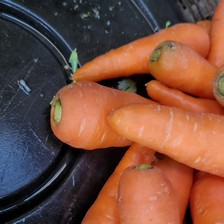

In [23]:
PIL.Image.open(str(Carrot[0]))

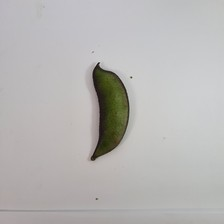

In [24]:
Bean = list(train_dir.glob('Bean/*'))
PIL.Image.open(str(Bean[0]))

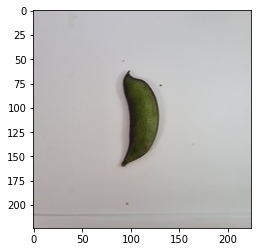

In [25]:
plt.imshow(PIL.Image.open(str(Bean[0])))

In [26]:
#cv2.imshow("Carrot 0",str(Carrot[0]))

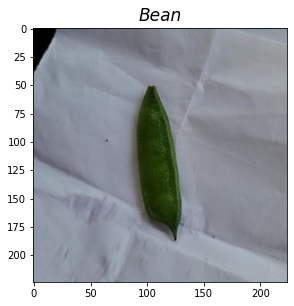

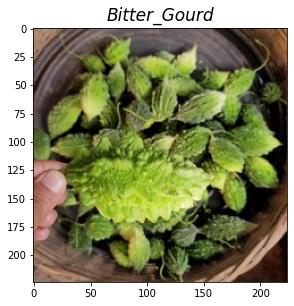

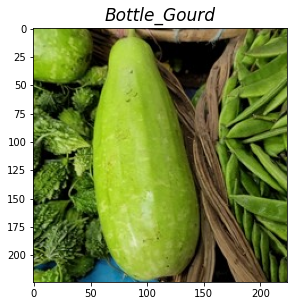

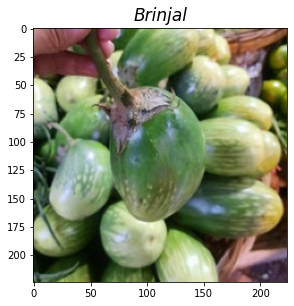

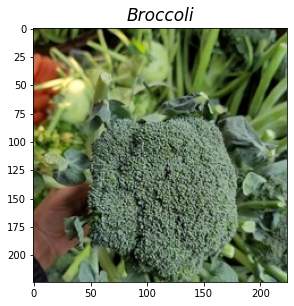

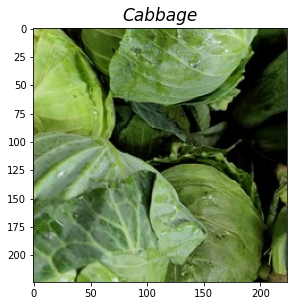

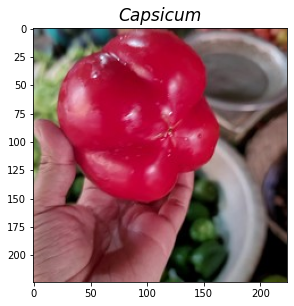

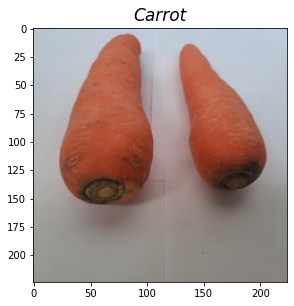

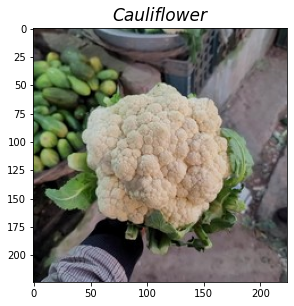

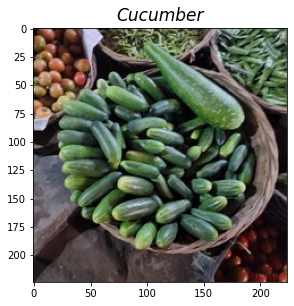

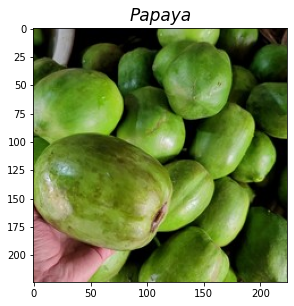

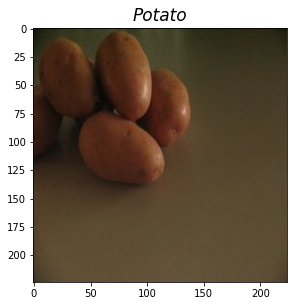

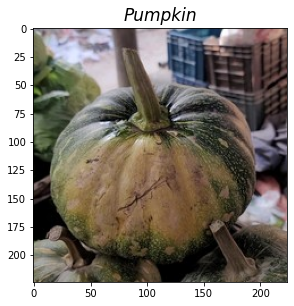

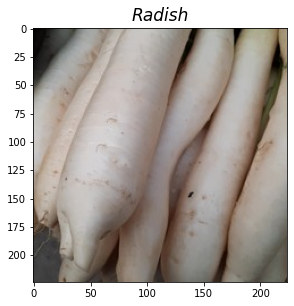

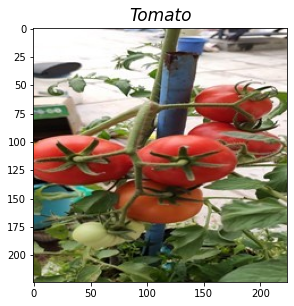

In [27]:
def plot(data_directory,number_of_images,image_folder):
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(data_directory,image_folder)
        a=random.choice(os.listdir(folder))
        image=PIL.Image.open(os.path.join(folder,a))
        plt.figure(figsize=(10,10))
        plt.subplot(number_of_images,2,j)
        plt.title(label=image_folder, size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

for j in classes :       
    plot(train_dir,1,j)

In [28]:
# Image Enhancment

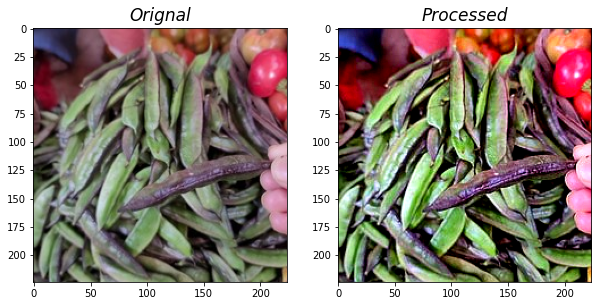

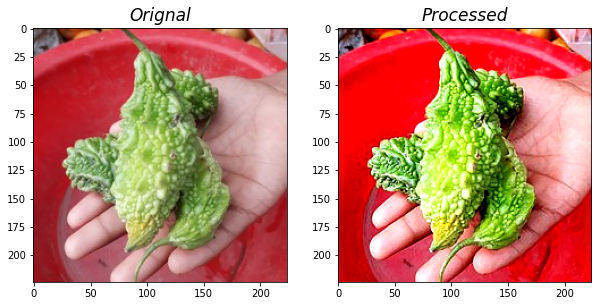

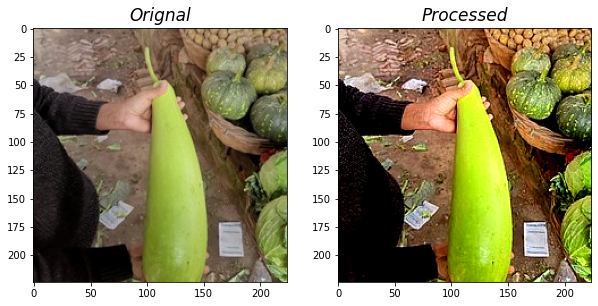

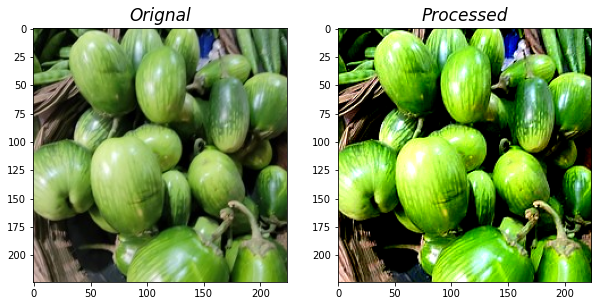

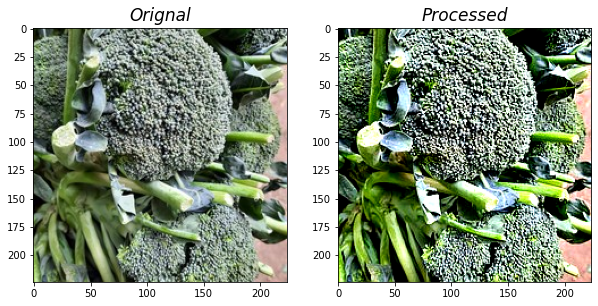

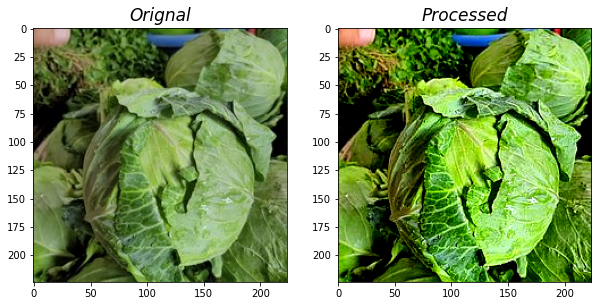

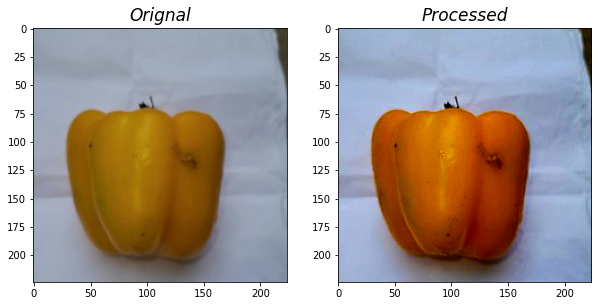

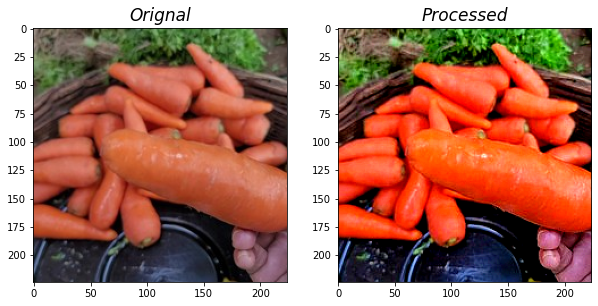

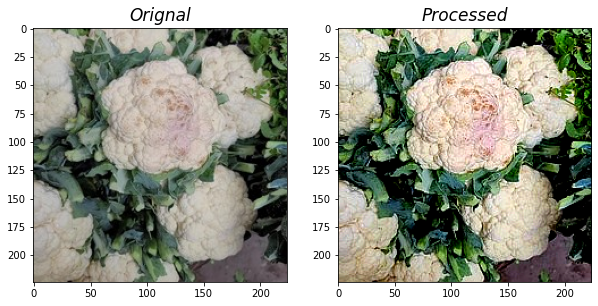

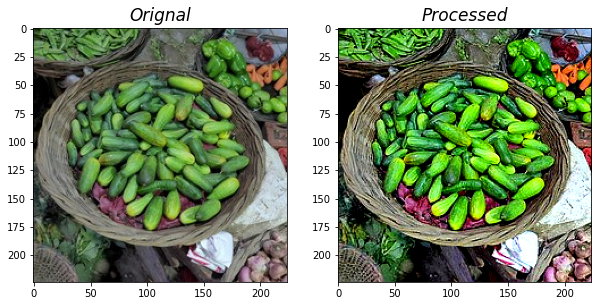

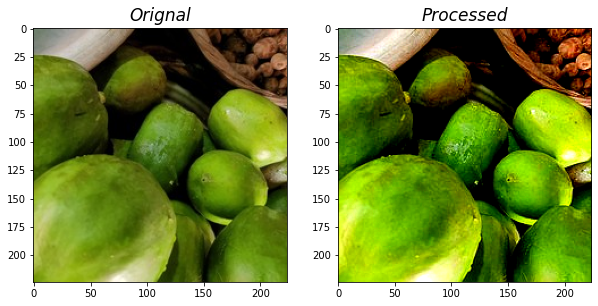

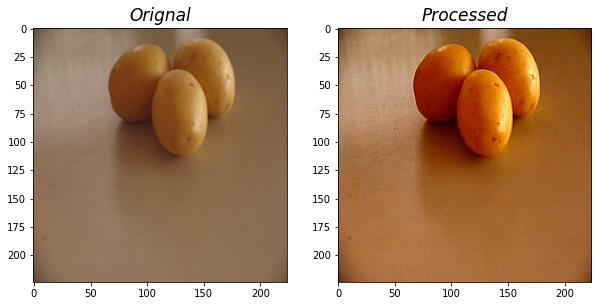

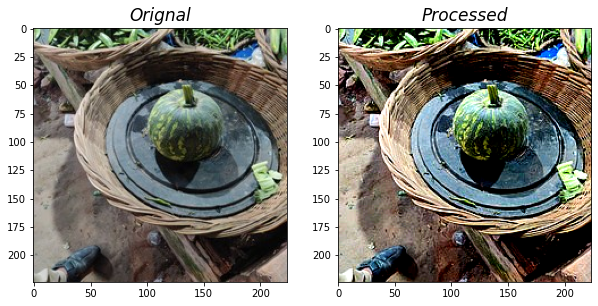

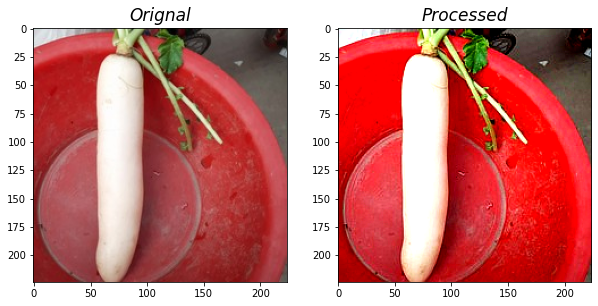

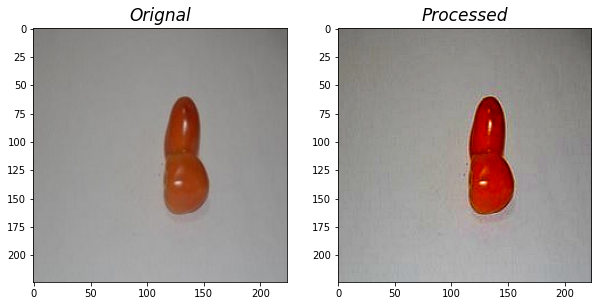

In [29]:
def Preprocess(data_directory,number_of_images,image_folder):
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(data_directory,image_folder)
        a=random.choice(os.listdir(folder))

        image=PIL.Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
for i in classes :       
    Preprocess(train_dir,1,i)

In [30]:
# Data Preparation

In [31]:
veg_images_dict_train = {
    'Bean': list(train_dir.glob('Bean/*')),
    'Bitter_Gourd': list(train_dir.glob('Bitter_Gourd/*')),
    'Bottle_Gourd': list(train_dir.glob('Bottle_Gourd/*')),
    'Brinjal': list(train_dir.glob('Brinjal/*')),
    'Broccoli': list(train_dir.glob('Broccoli/*')),
    'Cabbage': list(train_dir.glob('Cabbage/*')),
    'Capsicum': list(train_dir.glob('Capsicum/*')),
    'Carrot': list(train_dir.glob('Carrot/*')),
    'Cauliflower': list(train_dir.glob('Cauliflower/*')),
    'Cucumber': list(train_dir.glob('Cucumber/*')),
    'Papaya': list(train_dir.glob('Papaya/*')),
    'Potato': list(train_dir.glob('Potato/*')),
    'Pumpkin': list(train_dir.glob('Pumpkin/*')),
    'Radish': list(train_dir.glob('Radish/*')),
    'Tomato': list(train_dir.glob('Tomato/*')),
    'tulips': list(train_dir.glob('tulips/*'))
}
    

In [32]:
veg_labels_dict_train = {
    'Bean': 0,
    'Bitter_Gourd': 1,
    'Bottle_Gourd': 2,
    'Brinjal': 3,
    'Broccoli': 4,
    'Cabbage': 5,
    'Capsicum': 6,
    'Carrot': 7,
    'Cauliflower': 8,
    'Cucumber': 9,
    'Papaya': 10,
    'Potato': 11,
    'Pumpkin': 12,
    'Radish': 13,
    'Tomato': 14,
    'tulips': 15
}

In [33]:
str(veg_images_dict_train['Carrot'][0])

'C:\\Users\\LENOVO\\Desktop\\Ressources\\OpenCV and Tensorflow\\Vegetables\\train\\Carrot\\0001.jpg'

In [34]:
img = cv2.imread(str(veg_images_dict_train['Carrot'][0]))

In [35]:
img.shape

(224, 224, 3)

In [36]:
# Use GPU instead of CPU

In [37]:
#with tf.device('/GPU:0'):
#    X_train, y_train = [], []

In [38]:
X_train, y_train = [], []

In [39]:

for veg_name, images in veg_images_dict_train.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224)) # if there are any pics without a 224 size
        X_train.append(resized_img)
        y_train.append(veg_labels_dict_train[veg_name])

In [40]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [41]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
X_train[0].shape

(224, 224, 3)

In [43]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(224, 
                                                              224,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [44]:
num_classes = 15

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(224,224,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history = model.fit(X_train, y_train, epochs=15) 

Epoch 1/15
469/469 [==============================] - 225s 454ms/step - loss: 4.3965 - accuracy: 0.2425
Epoch 2/15
469/469 [==============================] - 198s 422ms/step - loss: 1.5992 - accuracy: 0.4583
Epoch 3/15
469/469 [==============================] - 66s 140ms/step - loss: 1.3075 - accuracy: 0.5645
Epoch 4/15
469/469 [==============================] - 65s 138ms/step - loss: 1.0516 - accuracy: 0.6451
Epoch 5/15
469/469 [==============================] - 64s 136ms/step - loss: 0.8921 - accuracy: 0.7066
Epoch 6/15
469/469 [==============================] - 66s 141ms/step - loss: 0.7383 - accuracy: 0.7547
Epoch 7/15
469/469 [==============================] - 68s 145ms/step - loss: 0.7221 - accuracy: 0.7657
Epoch 8/15
469/469 [==============================] - 70s 150ms/step - loss: 0.6328 - accuracy: 0.7949
Epoch 9/15
469/469 [==============================] - 71s 152ms/step - loss: 0.5704 - accuracy: 0.8190
Epoch 10/15
469/469 [==============================] - 73s 155ms/step -

In [45]:
# Create vlidation X and y

In [46]:
veg_images_dict_val = {
    'Bean': list(val_dir.glob('Bean/*')),
    'Bitter_Gourd': list(val_dir.glob('Bitter_Gourd/*')),
    'Bottle_Gourd': list(val_dir.glob('Bottle_Gourd/*')),
    'Brinjal': list(val_dir.glob('Brinjal/*')),
    'Broccoli': list(val_dir.glob('Broccoli/*')),
    'Cabbage': list(val_dir.glob('Cabbage/*')),
    'Capsicum': list(val_dir.glob('Capsicum/*')),
    'Carrot': list(val_dir.glob('Carrot/*')),
    'Cauliflower': list(val_dir.glob('Cauliflower/*')),
    'Cucumber': list(val_dir.glob('Cucumber/*')),
    'Papaya': list(val_dir.glob('Papaya/*')),
    'Potato': list(val_dir.glob('Potato/*')),
    'Pumpkin': list(val_dir.glob('Pumpkin/*')),
    'Radish': list(val_dir.glob('Radish/*')),
    'Tomato': list(val_dir.glob('Tomato/*')),
    'tulips': list(val_dir.glob('tulips/*'))
}

In [47]:
veg_labels_dict_val = {
    'Bean': 0,
    'Bitter_Gourd': 1,
    'Bottle_Gourd': 2,
    'Brinjal': 3,
    'Broccoli': 4,
    'Cabbage': 5,
    'Capsicum': 6,
    'Carrot': 7,
    'Cauliflower': 8,
    'Cucumber': 9,
    'Papaya': 10,
    'Potato': 11,
    'Pumpkin': 12,
    'Radish': 13,
    'Tomato': 14,
    'tulips': 15
}

In [48]:
X_val, y_val = [], []

for veg_name, images in veg_images_dict_val.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224)) # if there are any pics without a 224 size
        X_val.append(resized_img)
        y_val.append(veg_labels_dict_val[veg_name])

In [49]:
X_val = np.array(X_val)
y_val = np.array(y_val)

In [50]:
num_classes = 15

model1 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu',input_shape=(224,224,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history1 = model1.fit(X_val, y_val, epochs=20) 

Epoch 1/20
94/94 [==============================] - 16s 155ms/step - loss: 22.8910 - accuracy: 0.0977
Epoch 2/20
94/94 [==============================] - 15s 156ms/step - loss: 2.5879 - accuracy: 0.1640
Epoch 3/20
94/94 [==============================] - 15s 158ms/step - loss: 2.4519 - accuracy: 0.1980
Epoch 4/20
94/94 [==============================] - 15s 157ms/step - loss: 2.3201 - accuracy: 0.2383
Epoch 5/20
94/94 [==============================] - 15s 160ms/step - loss: 2.3594 - accuracy: 0.2213
Epoch 6/20
94/94 [==============================] - 15s 159ms/step - loss: 2.1756 - accuracy: 0.3030
Epoch 7/20
94/94 [==============================] - 15s 163ms/step - loss: 2.0817 - accuracy: 0.3267
Epoch 8/20
94/94 [==============================] - 15s 161ms/step - loss: 2.0380 - accuracy: 0.3457
Epoch 9/20
94/94 [==============================] - 15s 164ms/step - loss: 1.9459 - accuracy: 0.3683
Epoch 10/20
94/94 [==============================] - 15s 162ms/step - loss: 1.8601 - accur

In [51]:
# Create test X and y

In [52]:
veg_images_dict_test = {
    'Bean': list(test_dir.glob('Bean/*')),
    'Bitter_Gourd': list(test_dir.glob('Bitter_Gourd/*')),
    'Bottle_Gourd': list(test_dir.glob('Bottle_Gourd/*')),
    'Brinjal': list(test_dir.glob('Brinjal/*')),
    'Broccoli': list(test_dir.glob('Broccoli/*')),
    'Cabbage': list(test_dir.glob('Cabbage/*')),
    'Capsicum': list(test_dir.glob('Capsicum/*')),
    'Carrot': list(test_dir.glob('Carrot/*')),
    'Cauliflower': list(test_dir.glob('Cauliflower/*')),
    'Cucumber': list(test_dir.glob('Cucumber/*')),
    'Papaya': list(test_dir.glob('Papaya/*')),
    'Potato': list(test_dir.glob('Potato/*')),
    'Pumpkin': list(test_dir.glob('Pumpkin/*')),
    'Radish': list(test_dir.glob('Radish/*')),
    'Tomato': list(test_dir.glob('Tomato/*')),
    'tulips': list(test_dir.glob('tulips/*'))
}

In [53]:
veg_labels_dict_test = {
    'Bean': 0,
    'Bitter_Gourd': 1,
    'Bottle_Gourd': 2,
    'Brinjal': 3,
    'Broccoli': 4,
    'Cabbage': 5,
    'Capsicum': 6,
    'Carrot': 7,
    'Cauliflower': 8,
    'Cucumber': 9,
    'Papaya': 10,
    'Potato': 11,
    'Pumpkin': 12,
    'Radish': 13,
    'Tomato': 14,
    'tulips': 15
}

In [54]:
X_test, y_test = [], []

for veg_name, images in veg_images_dict_test.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224)) # if there are any pics without a 224 size
        X_test.append(resized_img)
        y_test.append(veg_labels_dict_test[veg_name])

In [55]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [56]:
X_test[0].shape

(224, 224, 3)

In [57]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 4s 38ms/step - loss: 0.2883 - accuracy: 0.9070


[0.28832536935806274, 0.9070000052452087]

In [60]:
acc = history.history['accuracy']
val_acc = history1.history['accuracy']
loss = history.history['loss']
val_loss = history1.history['loss']

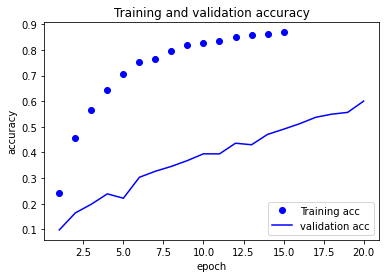

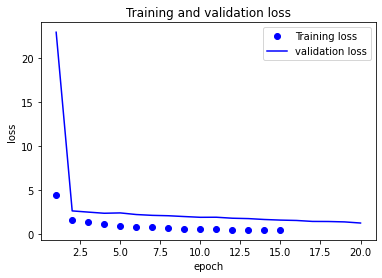

In [66]:
epochs = range(1, len(acc) + 1)
epochs1 = range(1, len(val_acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs1, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs1, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

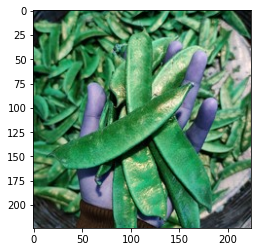

In [67]:
plt.imshow(X_test[0])

In [68]:
model.predict(X_test)

array([[9.99897718e-01, 1.39756935e-06, 7.95189248e-09, ...,
        6.27358452e-12, 1.71925829e-09, 1.24099703e-10],
       [9.99996781e-01, 6.49356258e-09, 1.47124908e-17, ...,
        4.06550213e-18, 5.16665940e-14, 4.03940282e-13],
       [9.96761620e-01, 1.11134595e-03, 1.04126215e-04, ...,
        1.02242404e-06, 3.69772897e-06, 1.07513624e-04],
       ...,
       [1.77245238e-05, 2.20132188e-05, 7.62502907e-07, ...,
        4.05342433e-07, 4.29579704e-05, 9.98160064e-01],
       [1.11022655e-06, 7.95928281e-05, 7.85951272e-07, ...,
        4.03035581e-02, 1.06912307e-06, 9.52923238e-01],
       [4.81632160e-05, 2.40071313e-04, 1.72460932e-05, ...,
        3.54577824e-02, 1.94751829e-05, 8.48730326e-01]], dtype=float32)

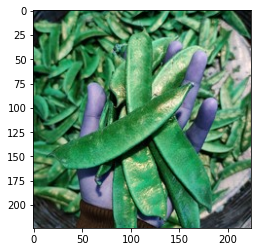

In [69]:
plt.imshow(X_test[0])

In [70]:
predictions = model.predict(X_test)

In [71]:
predictions[0]

array([9.9989772e-01, 1.3975693e-06, 7.9518925e-09, 4.7438887e-05,
       6.5690151e-06, 8.5720806e-08, 4.1658502e-08, 4.1844457e-15,
       9.9466888e-08, 4.6601352e-05, 3.2011613e-08, 2.4575575e-13,
       6.2735845e-12, 1.7192583e-09, 1.2409970e-10], dtype=float32)

In [72]:
score_0 = tf.nn.softmax(predictions[0])

In [73]:
np.argmax(score_0)

0

In [74]:
y_test[0]

0

In [75]:
score = tf.nn.softmax(predictions)

In [76]:
y_pred = []

In [77]:
for i in range(0,len(y_test)):
    y_pred.append(np.argmax(tf.nn.softmax(predictions[i])))

In [78]:
y_test

array([ 0,  0,  0, ..., 14, 14, 14])

In [79]:
y_test.shape

(3000,)

Text(69.0, 0.5, 'Truth')

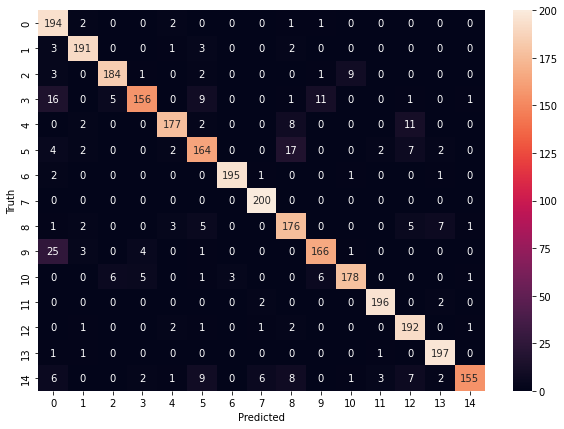

In [80]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Exemple of a carrot picture

In [81]:
img = cv2.imread(r'C:\Users\LENOVO\Desktop\Ressources\OpenCV and Tensorflow\Vegetables\exemple.jpg')

In [82]:
img.shape

(1414, 2121, 3)

In [83]:
img1 = cv2.resize(img,(224,224))

In [84]:
img1.shape

(224, 224, 3)

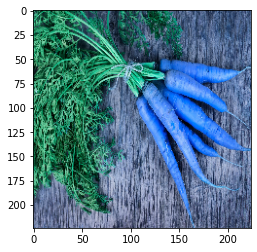

In [85]:
plt.imshow(img1)

In [86]:
recolor = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

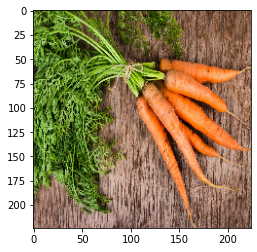

In [87]:
plt.imshow(recolor)

In [89]:
# change to this directory to save the picture in it
#os.chdir(r'C:\Users\LENOVO\Desktop\Ressources\OpenCV and Tensorflow\Vegetables')

#cv2.imwrite(recolor,recolor)

In [ ]:
model.predict(recolor)